Data Exploration (Tom, Timo, Adrien)

In [1]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/e4/43/fd3cd5989d6b592af1c2e4f37bf887f74b790f10b568b2497fe874a67fc7/matplotlib-3.8.3-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/fd/7c/168f8343f33d861305e18c56901ef1bb675d3c7f977f435ec72751a71a54/contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata
  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using ca


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("compas-scores-two-years.csv")
data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [13]:
data.isnull().sum().sort_values(ascending=False)

violent_recid              7214
vr_charge_degree           6395
vr_case_number             6395
vr_offense_date            6395
vr_charge_desc             6395
c_arrest_date              6077
r_jail_out                 4898
r_jail_in                  4898
r_days_from_arrest         4898
r_charge_desc              3801
r_offense_date             3743
r_case_number              3743
r_charge_degree            3743
c_offense_date             1159
c_jail_out                  307
days_b_screening_arrest     307
c_jail_in                   307
out_custody                 236
in_custody                  236
c_charge_desc                29
c_days_from_compas           22
c_case_number                22
v_type_of_assessment          0
type_of_assessment            0
decile_score.1                0
v_decile_score                0
v_score_text                  0
v_screening_date              0
screening_date                0
priors_count.1                0
start                         0
end     

<Axes: >

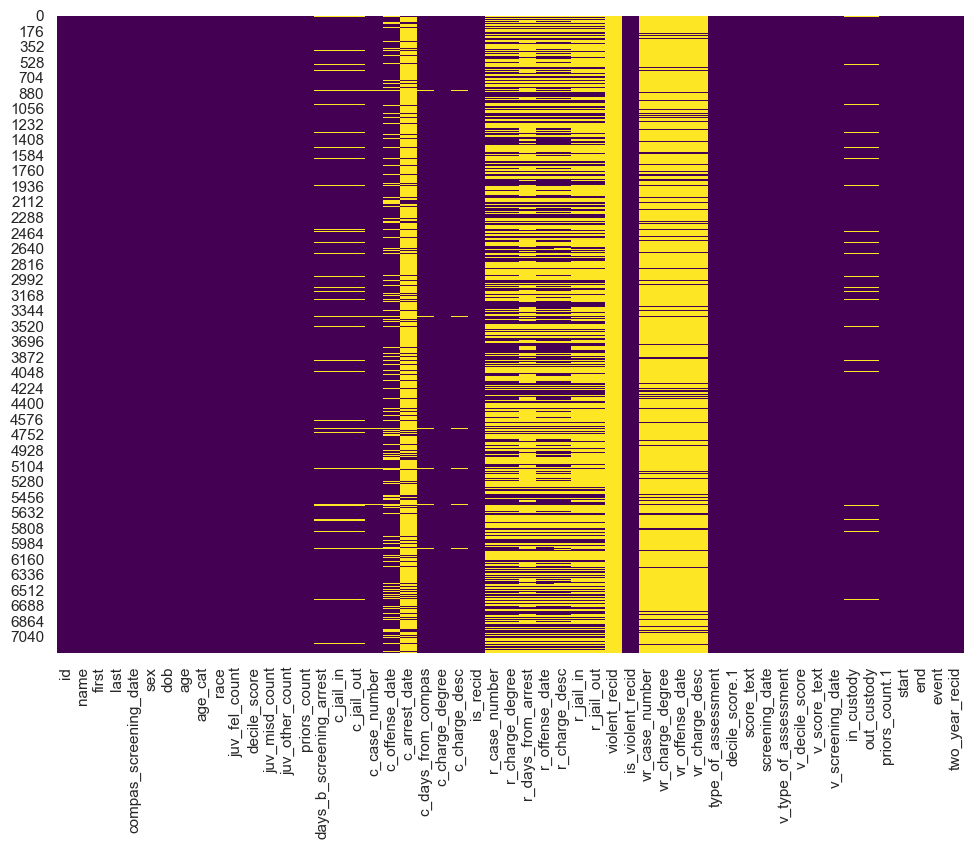

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # This adjusts the size of the plots, its optional to make your plots look more interesting.
sns.heatmap(data.isnull(), cbar=False,cmap = 'viridis')

In [17]:
data = data.drop(columns=['violent_recid', 'vr_charge_degree', 'vr_case_number', 'vr_offense_date', 'vr_charge_desc', 'c_arrest_date', 'r_jail_out', 'r_jail_in', 'r_days_from_arrest', 'r_charge_desc', 'r_offense_date', 'r_case_number', 'r_charge_degree'])


<Axes: >

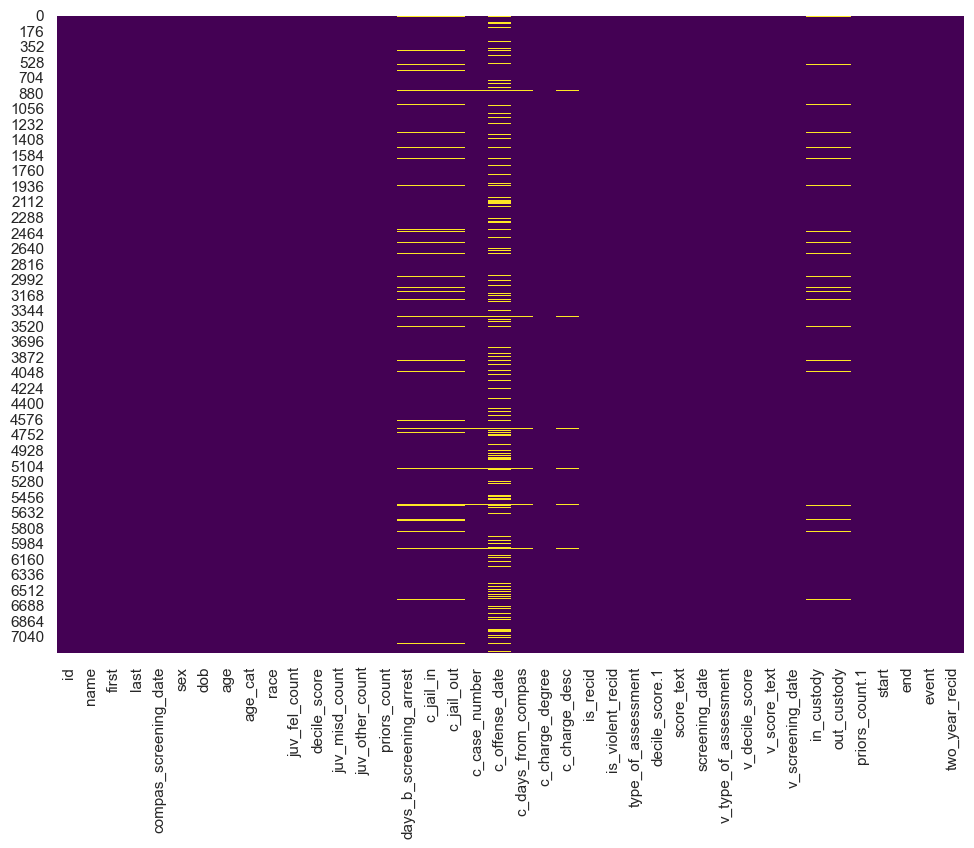

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # This adjusts the size of the plots, its optional to make your plots look more interesting.
sns.heatmap(data.isnull(), cbar=False,cmap = 'viridis')

In [19]:
non_categorical_features = data.select_dtypes(exclude=['object']).columns
correlation_matrix = data[non_categorical_features].corr()
correlation_matrix

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
id,1.000000,-0.013518,0.005094,0.001851,-0.000845,0.007392,-0.001190,-0.005650,-0.005970,0.021066,-0.003535,0.001851,0.000259,-0.001190,-0.008718,-0.002777,0.001912,0.016355
age,-0.013518,1.000000,-0.066003,-0.387733,-0.116833,-0.155286,0.142773,-0.043851,0.086600,-0.197393,-0.097033,-0.387733,-0.575900,0.142773,0.004984,0.189312,-0.150629,-0.190323
juv_fel_count,0.005094,-0.066003,1.000000,0.177758,0.089153,0.047210,0.178519,0.013238,0.002705,0.094038,0.055261,0.177758,0.173331,0.178519,0.035280,-0.081190,0.060358,0.092546
decile_score,0.001851,-0.387733,0.177758,1.000000,0.215927,0.183463,0.435350,0.045505,0.030330,0.352337,0.171292,1.000000,0.775697,0.435350,0.170209,-0.352111,0.246873,0.350703
juv_misd_count,-0.000845,-0.116833,0.089153,0.215927,1.000000,0.272421,0.243671,0.011475,0.006920,0.111709,0.089628,0.215927,0.206378,0.243671,0.045666,-0.096517,0.063382,0.109310
juv_other_count,0.007392,-0.155286,0.047210,0.183463,0.272421,1.000000,0.103611,0.007281,0.001697,0.109179,0.053514,0.183463,0.202292,0.103611,0.027620,-0.097031,0.067615,0.108004
priors_count,-0.001190,0.142773,0.178519,0.435350,0.243671,0.103611,1.000000,0.004373,0.014890,0.277780,0.091209,0.435350,0.208674,1.000000,0.154316,-0.272354,0.193585,0.275117
days_b_screening_arrest,-0.005650,-0.043851,0.013238,0.045505,0.011475,0.007281,0.004373,1.000000,0.087941,0.055807,0.025588,0.045505,0.054690,0.004373,-0.013503,-0.039453,0.036549,0.024481
c_days_from_compas,-0.005970,0.086600,0.002705,0.030330,0.006920,0.001697,0.014890,0.087941,1.000000,-0.071577,-0.014262,0.030330,-0.005826,0.014890,-0.023419,0.059999,-0.057818,-0.067530
is_recid,0.021066,-0.197393,0.094038,0.352337,0.111709,0.109179,0.277780,0.055807,-0.071577,1.000000,0.371624,0.352337,0.302153,0.277780,0.079221,-0.742394,0.817931,0.940544


<Axes: >

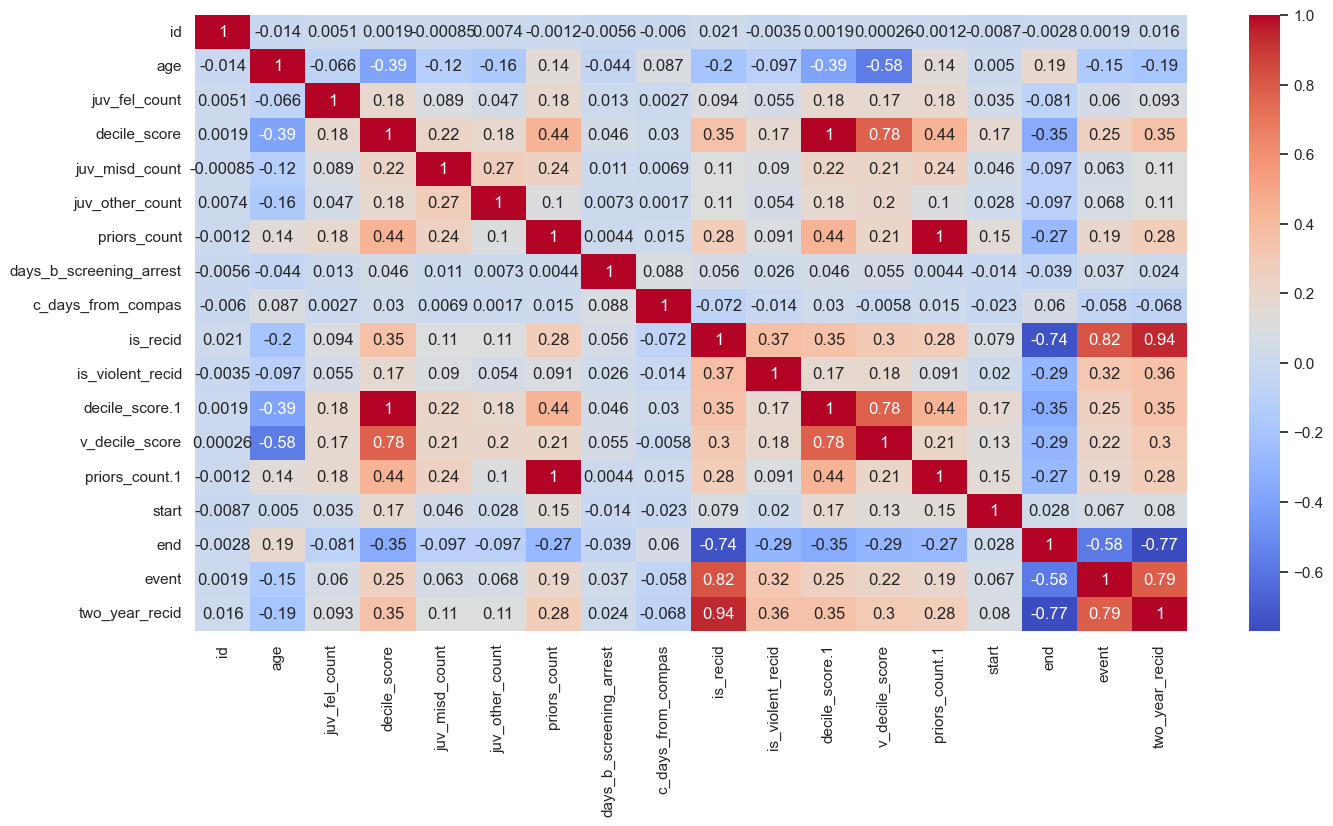

In [20]:

sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlation_matrix, annot = True, fmt='.2g',cmap= 'coolwarm')

In [25]:
threshold = 0.7  # Set the correlation threshold

# Find highly correlated feature pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Print the highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(f"Highly correlated pair: {pair}")

Highly correlated pair: ('decile_score', 'decile_score.1')
Highly correlated pair: ('decile_score', 'v_decile_score')
Highly correlated pair: ('priors_count', 'priors_count.1')
Highly correlated pair: ('is_recid', 'end')
Highly correlated pair: ('is_recid', 'event')
Highly correlated pair: ('is_recid', 'two_year_recid')
Highly correlated pair: ('decile_score.1', 'v_decile_score')
Highly correlated pair: ('end', 'two_year_recid')
Highly correlated pair: ('event', 'two_year_recid')


Since we are dealing with a racial bias set let's find the racial distribution

In [21]:
data['race'].value_counts()

race
African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: count, dtype: int64

<Axes: xlabel='race'>

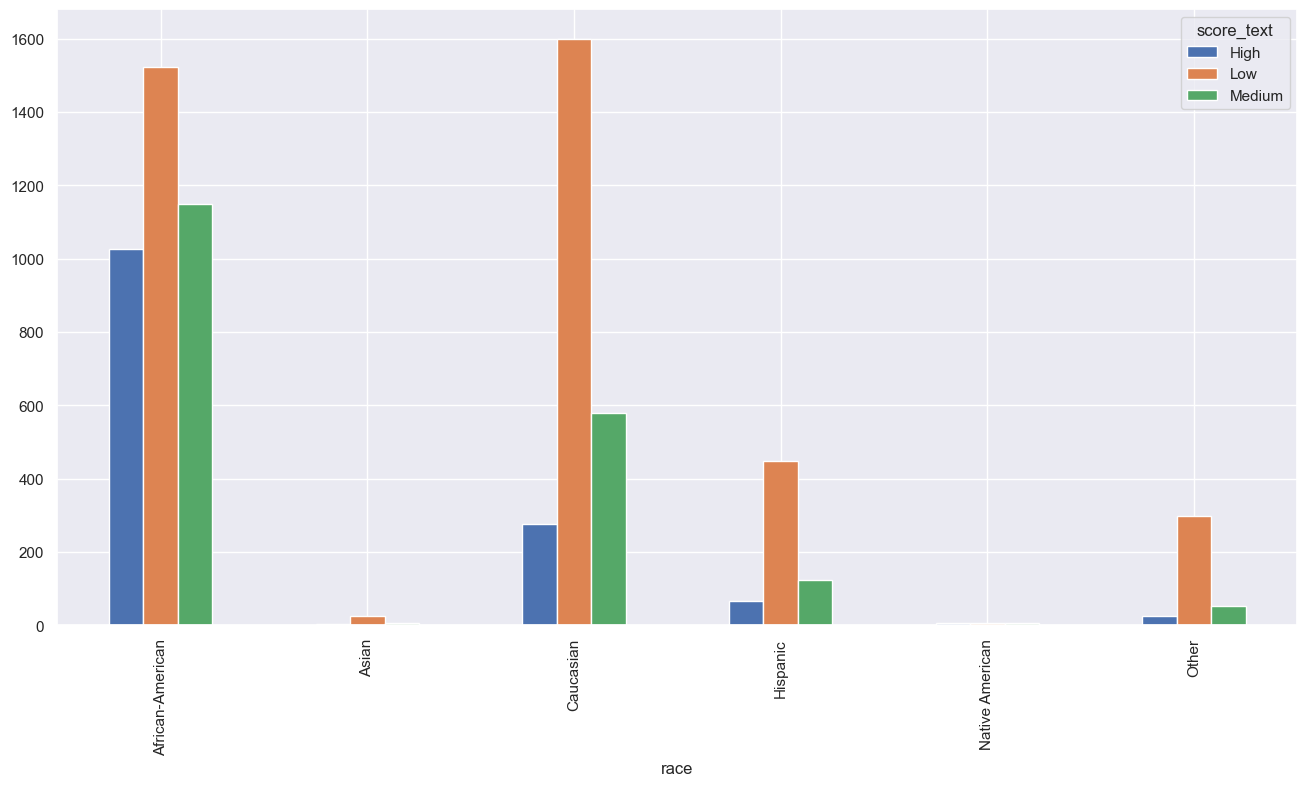

In [24]:
by_race = data.groupby(['race', 'score_text'], sort=True)['id'].size()
by_race.unstack().plot.bar(stacked=False)

Model Creation (Tanim)

XAI - SHAP (Daniel)

XAI - 2nd method